### HW 1-4

텍스트북의 3.4 (3.4_Binary_Classification_classifying-movie-reviews) 예제에서
<br/> 1) We are using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
<br/> 2) Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
<br/> 3) Try to use the`mse` loss function instead of `binary_crossentropy`.
<br/> 4) Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

#### 1. importing data

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data[0]

In [ ]:
train_labels[0]

In [ ]:
max([max(sequence) for sequence in train_data])

#### 2. preparing data (list to tensor)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2. building network

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

#### 3. setting optimizers

In [9]:
from keras import optimizers

network.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### 4. validation

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### 5. model (network) training

In [11]:
history = network.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 458us/step - loss: 0.5109 - accuracy: 0.7787 - val_loss: 0.3813 - val_accuracy: 0.8521
Epoch 2/20
15000/15000 [==============================] - 6s 376us/step - loss: 0.2939 - accuracy: 0.8985 - val_loss: 0.2926 - val_accuracy: 0.8882
Epoch 3/20
15000/15000 [==============================] - 6s 370us/step - loss: 0.2106 - accuracy: 0.9283 - val_loss: 0.2901 - val_accuracy: 0.8851
Epoch 4/20
15000/15000 [==============================] - 7s 484us/step - loss: 0.1597 - accuracy: 0.9457 - val_loss: 0.3054 - val_accuracy: 0.8786
Epoch 5/20
15000/15000 [==============================] - 7s 446us/step - loss: 0.1296 - accuracy: 0.9557 - val_loss: 0.2946 - val_accuracy: 0.8826
Epoch 6/20
15000/15000 [==============================] - 7s 485us/step - loss: 0.1050 - accuracy: 0.9657 - val_loss: 0.3322 - val_accuracy: 0.8782
Epoch 7/20
15000/15000 [==============================] - 8s 

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

#### 6. plotting training and validation loss

In [13]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'royalblue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

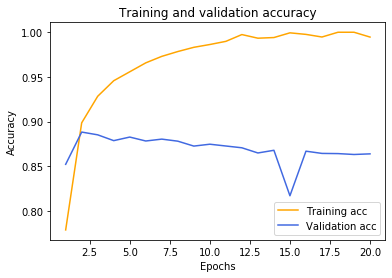

In [14]:
plt.clf() # clear figure

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'royalblue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 7. results

In [15]:
results = network.evaluate(x_test, y_test)

25000/25000 [==============================] - 20s 814us/step


In [16]:
results

[0.9089684934544563, 0.8507199883460999]